In [1]:
# https://medium.com/@enozeren/building-a-decision-tree-from-scratch-324b9a5ed836
# Decision Tree from scratch branch

In [1]:
from tree_node import TreeNode

In [2]:
import numpy as np
from decision_tree import DecisionTree
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from em_el.utils import draw_confusion_matrix

In [3]:
wine = load_wine()

In [4]:
X = np.array(wine.data)
y = np.array(wine.target)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
print(f"Train shape: {X_train.shape} \n Test shape: {X_test.shape}")


Train shape: (133, 13) 
 Test shape: (45, 13)


In [6]:
dt = DecisionTree(max_depth=4, min_samples_leaf=1)
dt.train(X_train, y_train)

In [26]:
dt.print_tree()

                                                                -> LEAF | Label Counts = 1.0->2 | Pred Probs = [0. 1. 0.]
                                                -> NODE | Information Gain = 0.8112781244591328 | Split IF X[1] < 2.6375 THEN left O/W right
                                                                -> LEAF | Label Counts = 2.0->6 | Pred Probs = [0. 0. 1.]
                                -> NODE | Information Gain = 0.3652896693946638 | Split IF X[6] < 1.02 THEN left O/W right
                                                                -> LEAF | Label Counts = 1.0->4, 2.0->1 | Pred Probs = [0.  0.8 0.2]
                                                -> NODE | Information Gain = 0.09790657010494236 | Split IF X[7] < 0.3 THEN left O/W right
                                                                -> LEAF | Label Counts = 1.0->20 | Pred Probs = [0. 1. 0.]
                -> NODE | Information Gain = 0.5945358575414802 | Split IF X[9] < 4.96 THEN left 

In [7]:
y_hat = dt.predict(X_test)
true_preds = np.sum(y_hat == y_test)

print(f"For {len(y_test)} test samples, we successfully predict {true_preds}")
acc = true_preds / len(y_test)
print("Accuracy: ", acc)

For 45 test samples, we successfully predict 41
Accuracy:  0.9111111111111111


Accuracy:  0.9111111111111111
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.95      0.86      0.90        21
           2       0.89      1.00      0.94         8

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.92        45
weighted avg       0.91      0.91      0.91        45

Confusion Matrix:
 [[15  1  0]
 [ 2 18  1]
 [ 0  0  8]]


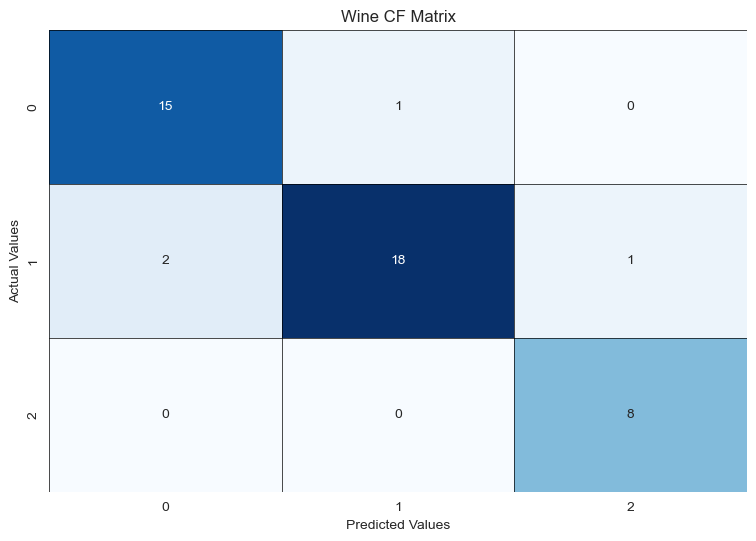

In [8]:
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy: ", accuracy)

clf_rep = classification_report(y_test, y_hat)
print("Classification Report: \n", clf_rep)

confusion_matrix = confusion_matrix(y_test, y_hat)
print("Confusion Matrix:\n", confusion_matrix)

draw_confusion_matrix(confusion_matrix, "Wine CF Matrix")